Setuping the Environment & Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [4]:
rnd.seed(42)

Load the Dataset

In [11]:
data = pd.read_excel('C:\\Users\\singh\\House-Price-Pediction\\HousePricePrediction\\HousePricePrediction.xlsx')


In [12]:
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [13]:
data['MSZoning'].value_counts()


MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [14]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


Performing Visualization

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

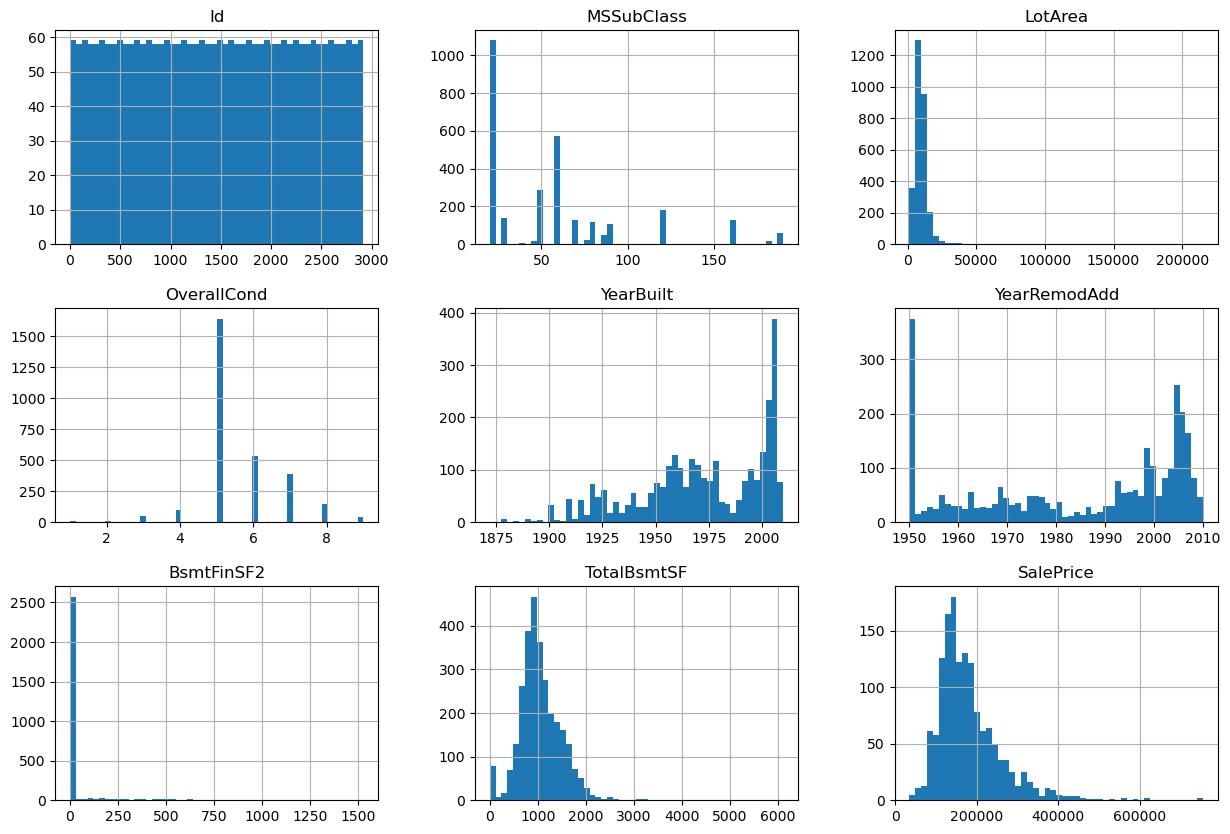

In [15]:
data.hist(bins=50, figsize=(15,10))


In [16]:
data = data.dropna(subset=['MSZoning'])

Working on Training and validation Split

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data['MSZoning']):
    strat_train_set = data.iloc[train_index]
    strat_test_set = data.iloc[test_index]



Utility

In [18]:
strat_train_set.to_csv("strat_train_set.csv", index=False)
strat_test_set.to_csv("strat_test_set.csv", index=False)


In [19]:
data = pd.read_csv("strat_train_set.csv")


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2332 non-null   int64  
 1   MSSubClass    2332 non-null   int64  
 2   MSZoning      2332 non-null   object 
 3   LotArea       2332 non-null   int64  
 4   LotConfig     2332 non-null   object 
 5   BldgType      2332 non-null   object 
 6   OverallCond   2332 non-null   int64  
 7   YearBuilt     2332 non-null   int64  
 8   YearRemodAdd  2332 non-null   int64  
 9   Exterior1st   2331 non-null   object 
 10  BsmtFinSF2    2331 non-null   float64
 11  TotalBsmtSF   2331 non-null   float64
 12  SalePrice     1163 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 237.0+ KB


Visualization Relationship

Text(0.5, 1.0, 'Lot Area vs Sale Price')

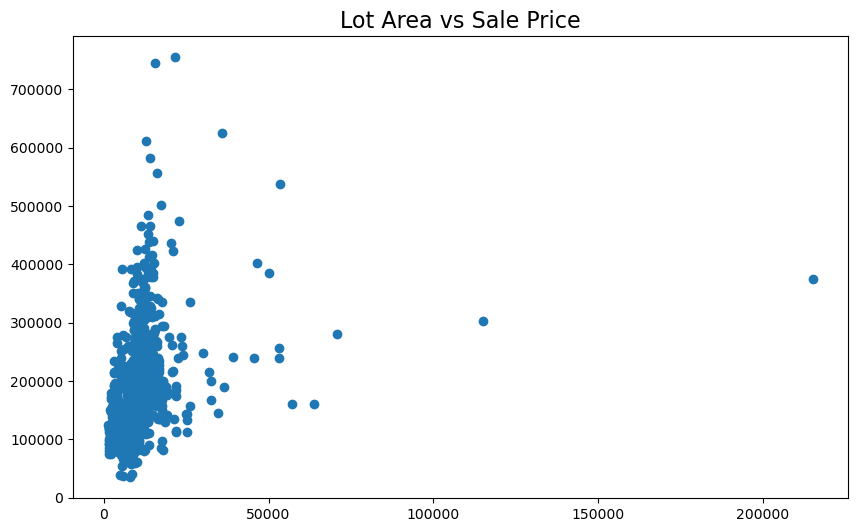

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['LotArea'], y=data['SalePrice'])
plt.title("Lot Area vs Sale Price", size=16)


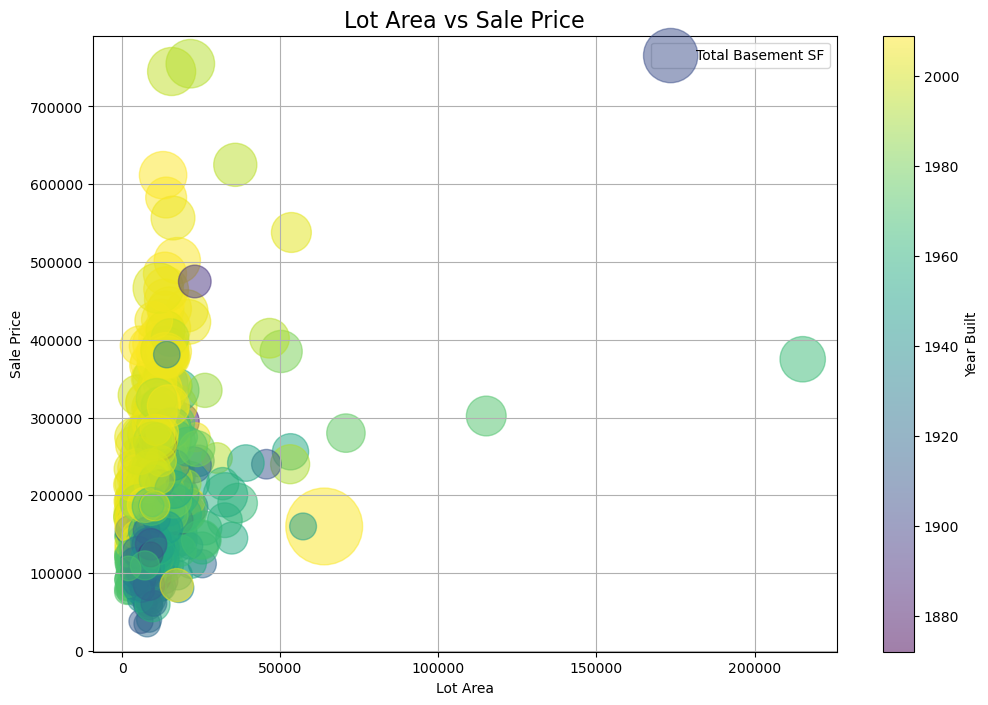

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(x=data['LotArea'],
            y=data['SalePrice'],
            alpha=0.5,
            s=data['TotalBsmtSF'] / 2,  
            c=data['YearBuilt'],       
            cmap='viridis',
            zorder=1,
            label='Total Basement SF')

plt.colorbar(label='Year Built')
plt.title("Lot Area vs Sale Price", size=16)
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.legend()
plt.grid(True)


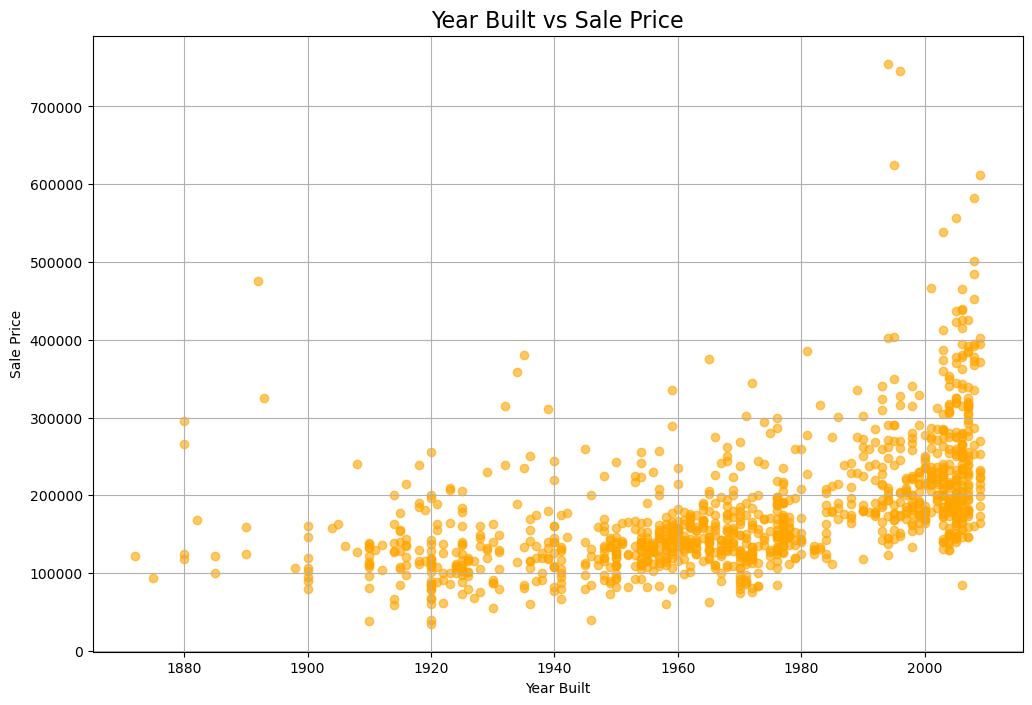

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(data['YearBuilt'], data['SalePrice'], alpha=0.6, c='orange')
plt.title("Year Built vs Sale Price", size=16)
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.grid(True)


In [24]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix['SalePrice'].sort_values(ascending=False)


SalePrice       1.000000
TotalBsmtSF     0.604622
YearBuilt       0.514769
YearRemodAdd    0.506050
LotArea         0.296873
BsmtFinSF2     -0.007255
Id             -0.020167
OverallCond    -0.064812
MSSubClass     -0.087749
Name: SalePrice, dtype: float64

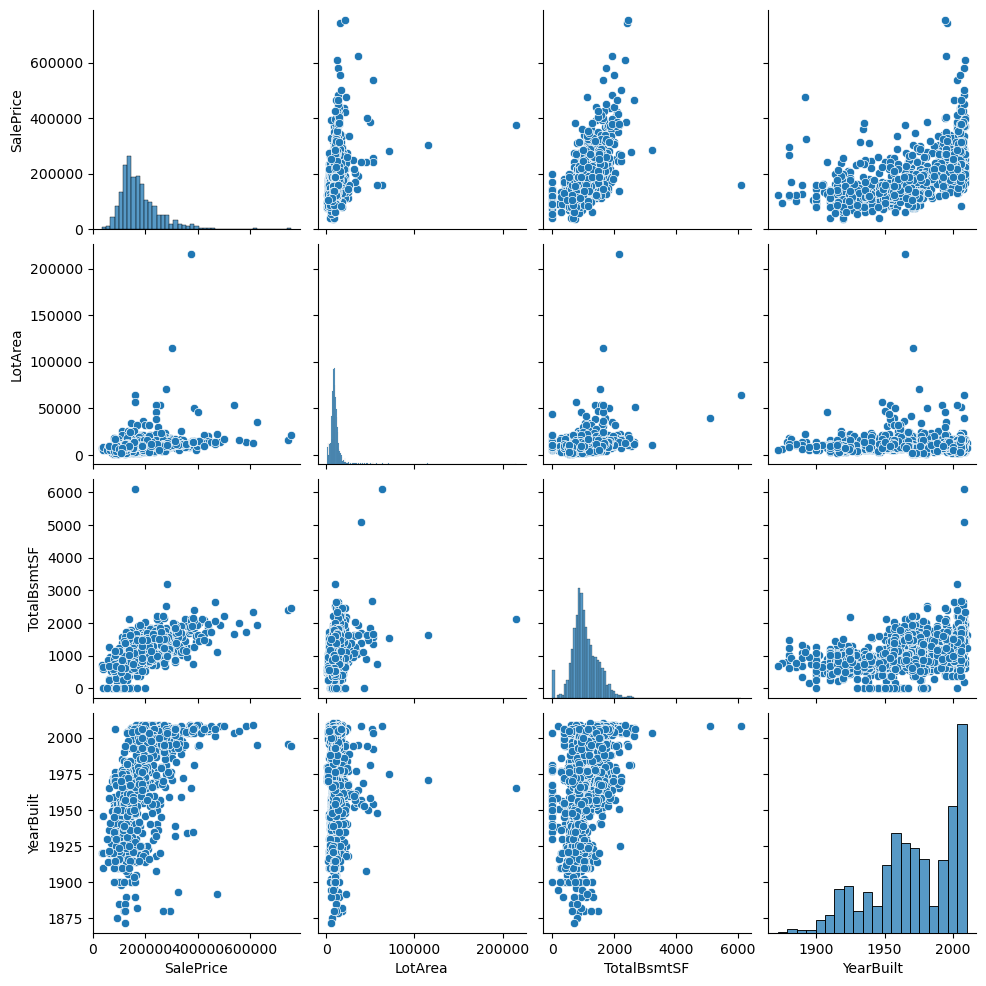

In [25]:
import seaborn as sns

sns.pairplot(data[['SalePrice', 'LotArea', 'TotalBsmtSF', 'YearBuilt']])


Text(0.5, 1.0, 'Sale Price vs Basement Area')

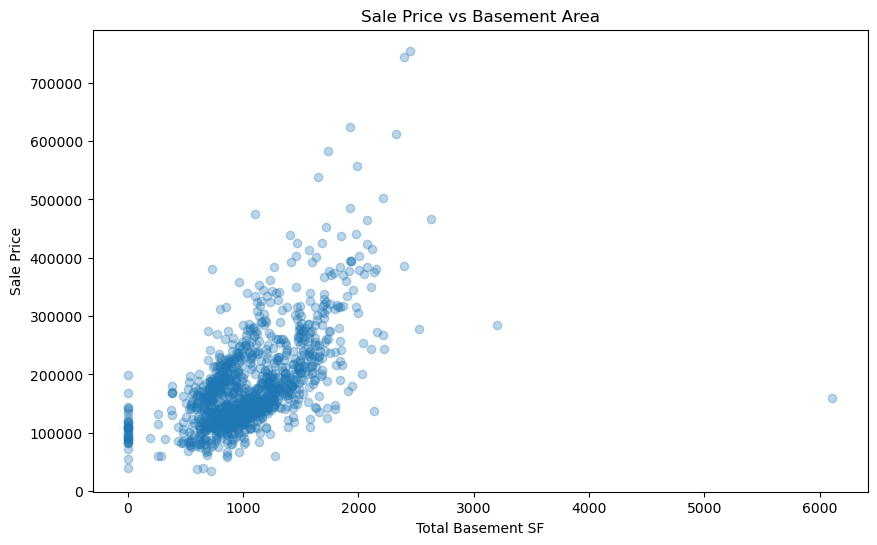

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['TotalBsmtSF'], y=data['SalePrice'], alpha=0.3)
plt.xlabel("Total Basement SF")
plt.ylabel("Sale Price")
plt.title("Sale Price vs Basement Area")


In [27]:
data1 = data.copy()

Features Engineering

In [28]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        if 'BedroomAbvGr' in X.columns and 'TotRmsAbvGrd' in X.columns:
            X['bedrooms_per_room'] = X['BedroomAbvGr'] / X['TotRmsAbvGrd'].replace(0, np.nan)
        if all(col in X.columns for col in ['FullBath', 'HalfBath']):
            X['TotalBathrooms'] = X['FullBath'] + 0.5 * X['HalfBath']
        if all(col in X.columns for col in ['GrLivArea', 'TotalBsmtSF']):
            X['TotalArea'] = X['GrLivArea'] + X['TotalBsmtSF']
        if all(col in X.columns for col in ['SalePrice', 'GrLivArea']):
            X['PricePerSqFt'] = X['SalePrice'] / X['GrLivArea'].replace(0, np.nan)
        return X


In [29]:
data1.head(1)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,1393,190,RM,10800,Inside,2fmCon,7,1905,2000,Wd Sdng,0.0,482.0,163000.0


In [30]:
corr_matrix = data1.corr(numeric_only=True)
print(corr_matrix['SalePrice'].sort_values(ascending=False))


SalePrice       1.000000
TotalBsmtSF     0.604622
YearBuilt       0.514769
YearRemodAdd    0.506050
LotArea         0.296873
BsmtFinSF2     -0.007255
Id             -0.020167
OverallCond    -0.064812
MSSubClass     -0.087749
Name: SalePrice, dtype: float64


In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

class NewFeaturesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X['bedrooms_per_room'] = X['BedroomAbvGr'] / X['TotRmsAbvGrd']
        X['TotalBathrooms'] = X['FullBath'] + 0.5 * X['HalfBath']
        X['TotalArea'] = X['GrLivArea'] + X['TotalBsmtSF']
        return X


In [32]:
def get_null_count(data):
    for i in data.columns:
        print(i, ':', data[i].isnull().sum())


In [33]:
get_null_count(data)

Id : 0
MSSubClass : 0
MSZoning : 0
LotArea : 0
LotConfig : 0
BldgType : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
Exterior1st : 1
BsmtFinSF2 : 1
TotalBsmtSF : 1
SalePrice : 1169


In [34]:
data1 = data.copy()
data1['PricePerSqFt'] = data1['SalePrice'] / data1['LotArea']
data1['BasementRatio'] = data1['TotalBsmtSF'] / data1['LotArea']


In [35]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')


array([[<Axes: title={'center': 'BasementRatio'}>]], dtype=object)

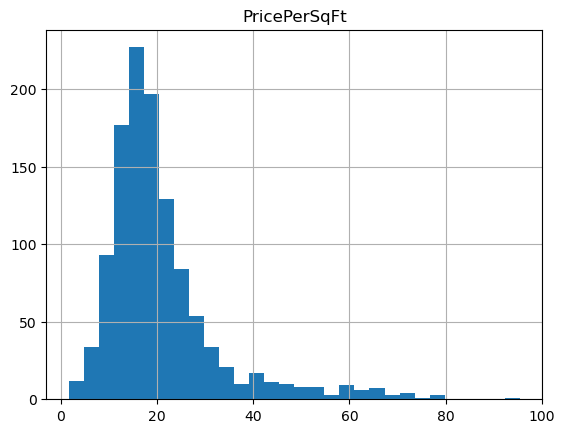

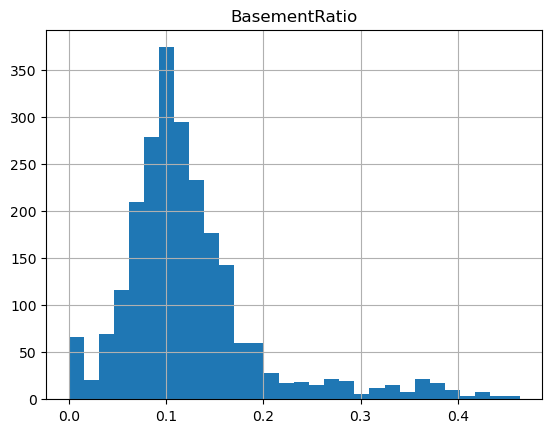

In [36]:
data1.hist(column='PricePerSqFt', bins=30)
data1.hist(column='BasementRatio', bins=30)


Missing value Anaysis

In [37]:
def get_null_count(data):
    for i in data.columns:
        print(i, ':', data[i].isnull().sum())

get_null_count(data1)


Id : 0
MSSubClass : 0
MSZoning : 0
LotArea : 0
LotConfig : 0
BldgType : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
Exterior1st : 1
BsmtFinSF2 : 1
TotalBsmtSF : 1
SalePrice : 1169
PricePerSqFt : 1169
BasementRatio : 1
